In [1]:
# ✅ Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# ✅ Step 2: Load clean dataset and create a dirty copy
df = sns.load_dataset("iris")
df_dirty = df.copy()

# ✅ Step 3: Introduce missing values artificially
df_dirty.loc[5:10, 'sepal_length'] = np.nan
df_dirty.loc[15:17, 'species'] = None

# ✅ Step 4: Add a duplicate row
df_dirty = pd.concat([df_dirty, df_dirty.iloc[[0]]], ignore_index=True)

# ✅ Step 5: Add inconsistent string data
df_dirty.loc[0, 'species'] = 'Setosa '
df_dirty.loc[1, 'species'] = 'setosa'
df_dirty.loc[2, 'species'] = 'SETOSA'

# ✅ Show first few dirty rows
print("🔍 Dirty Dataset Preview:")
df_dirty.head(10)


🔍 Dirty Dataset Preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,NaN,3.9,1.7,0.4,setosa
6,NaN,3.4,1.4,0.3,setosa
7,NaN,3.4,1.5,0.2,setosa
8,NaN,2.9,1.4,0.2,setosa
9,NaN,3.1,1.5,0.1,setosa


In [2]:
# ✅ 1. Handling Missing Values
print("\nMissing Values Count:")
print(df_dirty.isnull().sum())

# Option 1: Drop rows with missing values
df_cleaned = df_dirty.dropna()

# Option 2: Fill missing values with mean (alternative to dropping)
df_filled = df_dirty.copy()
df_filled['sepal_length'] = df_filled['sepal_length'].fillna(df_filled['sepal_length'].mean())
df_filled['species'] = df_filled['species'].fillna('unknown')

# ✅ 2. Handling Duplicates
print("\nDuplicate Rows Found:", df_filled.duplicated().sum())
df_filled = df_filled.drop_duplicates()

# ✅ 3. Fixing Inconsistent Categorical Data
# Standardize species column: lowercase + strip whitespace
df_filled['species'] = df_filled['species'].str.lower().str.strip()

# ✅ 4. Final Cleaned Data Summary
print("\n✅ Cleaned Data Summary:")
print(df_filled.info())
print("\nUnique species after cleaning:", df_filled['species'].unique())



Missing Values Count:
sepal_length    6
sepal_width     0
petal_length    0
petal_width     0
species         3
dtype: int64

Duplicate Rows Found: 1

✅ Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None

Unique species after cleaning: ['setosa' 'unknown' 'versicolor' 'virginica']


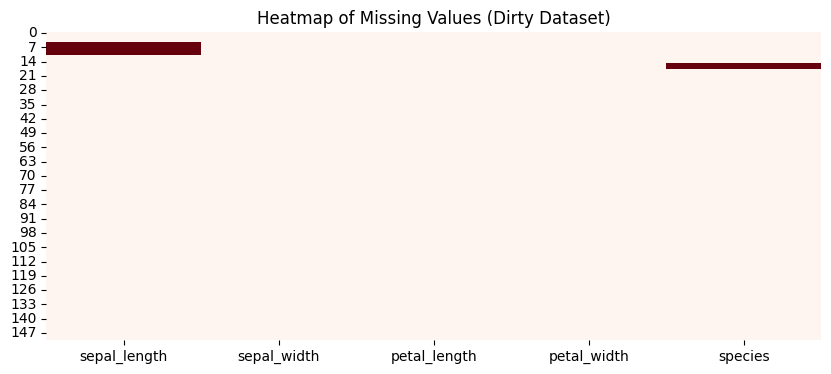

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(df_dirty.isnull(), cbar=False, cmap='Reds')
plt.title("Heatmap of Missing Values (Dirty Dataset)")
plt.show()
